# About this notebook 

#### Objective: Petfinder Machine Learning - Part 2a


<div class="span5 alert alert-success">
<p> <I> Petfinder Machine Learning: </I> The objective for this report is to share a second round of machine learning results to build a model to predict the speed at which a pet is adopted.  In the second round the following changes to try and improve the model are applied...  
<br>
1.	Outliers (pets older than 12 years old are removed from the data)   
2.	Scalarization is applied to features where this might help the algorithms produce a better model  
3.	Hyper-parameter tuning is applied to the algorithms  
4.	Word-2-Vec is applied to the Pet Description for use in NLP  
5.	An ensemble combines the best performing non-NLP with the best performing NLP algorithm  
    <br>
The classification areas are...   
    <br>
0 - Pet was adopted on the same day it was listed  
1 - Pet was adopted between 1 and 7 days (1st week) after being listed  
2 - Pet was adopted between 8 and 30 days (1st month) after being listed  
3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed  
4 – No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days   
 </p>
</div>

<div class="span5 alert alert-success">
<p> <I> Data fields: </I> For a list of the features available to predict the adoption rate visit the source data at: <br>   https://www.kaggle.com/c/petfinder-adoption-prediction/data 
 </p>
</div>

<div class="span5 alert alert-info">
<p> <B>  Imports and Data Loading: </B>  </p>
</div>

In [126]:
import warnings
warnings.filterwarnings('ignore')

%cd C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\CapstoneProject2Repository\09 PetfindersData\TrainingData

C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\CapstoneProject2Repository\09 PetfindersData\TrainingData


In [127]:
#Imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale

from sklearn.neighbors import KNeighborsClassifier 

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

from sklearn import svm

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [128]:
#Import the csv file
dfi = pd.read_csv('train.csv')

<div class="span5 alert alert-info">
<p> <B>  Remove Outliers (pets older than 12 years old are removed from the data) </B> 

</p>
</div>

In [129]:
dfi2 = dfi[dfi.Age < (12 * 12)]

print('Total pets with outliers included:' + str(dfi.Age.count()))
print()
print('Total pets with outliers deleted:' + str(dfi2.Age.count()))
print()
print('Total pets removed: ' + str(dfi.Age.count() - dfi2.Age.count()))

Total pets with outliers included:14993

Total pets with outliers deleted:14978

Total pets removed: 15


<div class="span5 alert alert-info">
<p> <B>  Machine Learning: </B> 

</p>
</div>

<div class="span5 alert alert-success">
<p> Prepare to run the algorithms
 </p>
</div>

In [130]:
#Drop the columns that are not needed
dfm = dfi2.drop(['Name','RescuerID','Description','PetID'],axis=1)
dfm.head(1)

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
0,1,2,0,26,2,2,0,0,2,1,1,1,2,1,1,0,41326,0,3,3


In [131]:
#Create the array
array = dfm.values
X = array[:,0:19]
Y = array[:,19]

In [132]:
#Apply scaling
X_scaled = scale(X)

In [133]:
#Create a training and test data set
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=test_size,
random_state=seed)

<div class="span5 alert alert-success">
<p> Algorithm 1: Logistic Regression
 </p>
</div>

In [134]:
#Algorithm 1: Fit the model
model = LogisticRegression(multi_class='multinomial', solver='newton-cg')

model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [135]:
#Algorithm 1: Predict the labels of the test set
Y_pred = model.predict(X_test)

In [136]:
#Algorithm 1: Score the model
print('CONFUSION MATRIX FOR LOGISTIC REGRESSION')
print(confusion_matrix(Y_test, Y_pred))

print()

print('CLASSIFICATION REPORT')
print(classification_report(Y_test, Y_pred))

print()

print('ACCURACY SCORE')
print(accuracy_score(Y_test,Y_pred))

CONFUSION MATRIX FOR LOGISTIC REGRESSION
[[  0  35  45   5  45]
 [  0 224 347  74 356]
 [  0 209 450 123 557]
 [  0 132 333 175 456]
 [  0 153 243  94 887]]

CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       130
          1       0.30      0.22      0.26      1001
          2       0.32      0.34      0.33      1339
          3       0.37      0.16      0.22      1096
          4       0.39      0.64      0.48      1377

avg / total       0.34      0.35      0.32      4943


ACCURACY SCORE
0.35120372243576775


<div class="span5 alert alert-success">
<p> Algorithm 2: K Nearest Neighbors (KNN)
 </p>
</div>

In [137]:
#Algorithm 2: Fit the model
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [138]:
#Algorithm 2: Predict the labels of the test set
Y_pred = model.predict(X_test)

In [139]:
#Algorithm 2: Score the model
print('CONFUSION MATRIX FOR KNN')
print(confusion_matrix(Y_test, Y_pred))

print()

print('CLASSIFICATION REPORT')
print(classification_report(Y_test, Y_pred))

print()

print('ACCURACY SCORE')
print(accuracy_score(Y_test,Y_pred))

CONFUSION MATRIX FOR KNN
[[ 14  61  31   8  16]
 [ 64 416 268 102 151]
 [ 62 496 400 152 229]
 [ 53 352 289 212 190]
 [ 63 389 338 135 452]]

CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.05      0.11      0.07       130
          1       0.24      0.42      0.31      1001
          2       0.30      0.30      0.30      1339
          3       0.35      0.19      0.25      1096
          4       0.44      0.33      0.37      1377

avg / total       0.33      0.30      0.30      4943


ACCURACY SCORE
0.30224559983815497


<div class="span5 alert alert-success">
<p> Algorithm 3: Naive Bayes
 </p>
</div>

In [140]:
#Algorithm 3: Fit the model
model = GaussianNB()

model.fit(X_train,Y_train)

GaussianNB(priors=None)

In [141]:
#Algorithm 3: Predict the labels of the test set
Y_pred = model.predict(X_test)

In [142]:
#Algorithm 3: Score the model
print('CONFUSION MATRIX FOR NAIVE-BAYES')
print(confusion_matrix(Y_test, Y_pred))

print()

print('CLASSIFICATION REPORT')
print(classification_report(Y_test, Y_pred))

print()

print('ACCURACY SCORE')
print(accuracy_score(Y_test,Y_pred))

CONFUSION MATRIX FOR NAIVE-BAYES
[[  0  73  25   5  27]
 [ 23 489 210  91 188]
 [ 25 470 351 135 358]
 [ 26 313 281 153 323]
 [ 17 309 253 114 684]]

CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       130
          1       0.30      0.49      0.37      1001
          2       0.31      0.26      0.29      1339
          3       0.31      0.14      0.19      1096
          4       0.43      0.50      0.46      1377

avg / total       0.33      0.34      0.32      4943


ACCURACY SCORE
0.3392676512239531


<div class="span5 alert alert-success">
<p> Algorithm 4: Random Forest Classifier
 </p>
</div>

In [143]:
#Algorithm 4: Fit the model
model = RandomForestClassifier()

model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [144]:
#Algorithm 4: Predict the labels of the test set
Y_pred = model.predict(X_test)

In [145]:
#Algorithm 4: Score the model
print('CONFUSION MATRIX FOR RANDOM FOREST CLASSIFIER')
print(confusion_matrix(Y_test, Y_pred))

print()

print('CLASSIFICATION REPORT')
print(classification_report(Y_test, Y_pred))

print()

print('ACCURACY SCORE')
print(accuracy_score(Y_test,Y_pred))

CONFUSION MATRIX FOR RANDOM FOREST CLASSIFIER
[[  5  53  32  18  22]
 [ 20 359 287 142 193]
 [ 13 347 451 252 276]
 [ 10 238 317 287 244]
 [  8 194 309 178 688]]

CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.09      0.04      0.05       130
          1       0.30      0.36      0.33      1001
          2       0.32      0.34      0.33      1339
          3       0.33      0.26      0.29      1096
          4       0.48      0.50      0.49      1377

avg / total       0.36      0.36      0.36      4943


ACCURACY SCORE
0.36212826218895405


<div class="span5 alert alert-success">
<p> Algorithm 5: XGBoost
 </p>
</div>

In [146]:
#Algorithm 5: Fit the model
model = XGBClassifier()

model.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [147]:
#Algorithm 5: Predict the labels of the test set
Y_pred = model.predict(X_test)

In [148]:
#Algorithm 5: Score the model
print('CONFUSION MATRIX FOR RANDOM FOREST CLASSIFIER')
print(confusion_matrix(Y_test, Y_pred))

print()

print('CLASSIFICATION REPORT')
print(classification_report(Y_test, Y_pred))

print()

print('ACCURACY SCORE')
print(accuracy_score(Y_test,Y_pred))

CONFUSION MATRIX FOR RANDOM FOREST CLASSIFIER
[[  1  51  36   1  41]
 [  0 311 392  57 241]
 [  0 240 579 135 385]
 [  0 168 391 171 366]
 [  0 110 294  58 915]]

CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       1.00      0.01      0.02       130
          1       0.35      0.31      0.33      1001
          2       0.34      0.43      0.38      1339
          3       0.41      0.16      0.23      1096
          4       0.47      0.66      0.55      1377

avg / total       0.41      0.40      0.37      4943


ACCURACY SCORE
0.39995953874165485


<div class="span5 alert alert-info">
<p> <B> Feature Importance: </B> 

</p>
</div>

<div class="span5 alert alert-success">
<p> Use XGBoost to evaluate feature importance
 </p>
</div>

In [149]:
#Display the feature names from the adoption dataframe
feature_names = list(dfm.columns)
#print(feature_names)

In [150]:
#Display the feature importance scores
feature_importance = model.feature_importances_
#print(feature_importance)

In [151]:
#Use zip to combine the feature names and importance scores; then generate a dataframe of this information
feature_names_and_scores = list(zip(feature_names,feature_importance))

dffi = pd.DataFrame(feature_names_and_scores)
dffi.columns = ['feature','importance']
dffi = dffi.sort_values(by='importance',ascending=False)
dffi = dffi.set_index('feature')

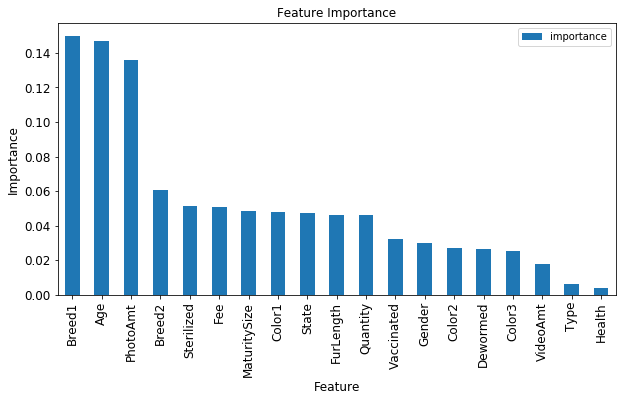

In [152]:
#Create a bar chart of feature importance
ax = dffi.plot(kind='bar', title ="Feature Importance", figsize=(10, 5), legend=True, fontsize=12)
ax.set_xlabel("Feature", fontsize=12)
ax.set_ylabel("Importance", fontsize=12)
pyplot.show()